In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)


In [2]:
transactions = pd.read_csv(
    "../data/raw/train_transaction.csv")

In [3]:
transactions.shape #590540 rows & 394 columns

(590540, 394)

In [4]:
transactions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,...,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
transactions["isFraud"].value_counts(normalize=True)*100

isFraud
0    96.500999
1     3.499001
Name: proportion, dtype: float64

* we have:
- Fraud ≈ 3% 
- Non-fraud ≈ 96%

In [6]:
#Missing Values check

In [7]:
missing_ratio = transactions.isnull().mean().sort_values(ascending=False)
missing_ratio.head(10)

dist2    0.936284
D7       0.934099
D13      0.895093
D14      0.894695
D12      0.890410
D6       0.876068
D9       0.873123
D8       0.873123
V153     0.861237
V149     0.861237
dtype: float64

* We Have:
- Many columns >90% missing
- Identity-related signals are sparse

In [8]:
##Transaction amount analysis

In [9]:
###Log-scaled Distribution

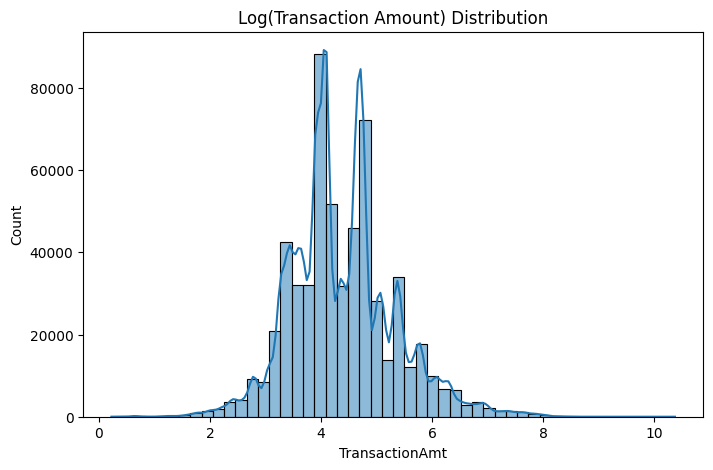

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(
    np.log1p(transactions["TransactionAmt"]),
    bins=50,
    kde=True
)
plt.title("Log(Transaction Amount) Distribution")
plt.show()

In [11]:
##Box plot

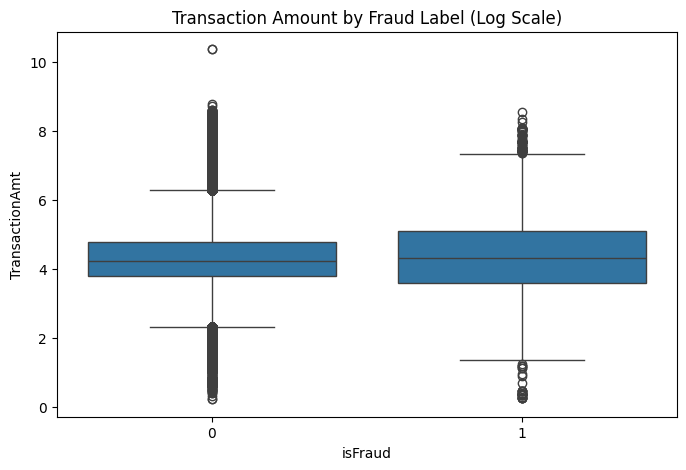

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="isFraud",y=np.log1p(transactions["TransactionAmt"]), data=transactions)
plt.title("Transaction Amount by Fraud Label (Log Scale)")
plt.show()

* Fraud transactions tend to have higher variance and often cluster in extreme ranges

In [13]:
###Time Based Behaviour

In [14]:
#Creating hour Feature
seconds_in_hour = 3600
transactions["transaction_hour"] = (transactions["TransactionDT"] // seconds_in_hour) % 24

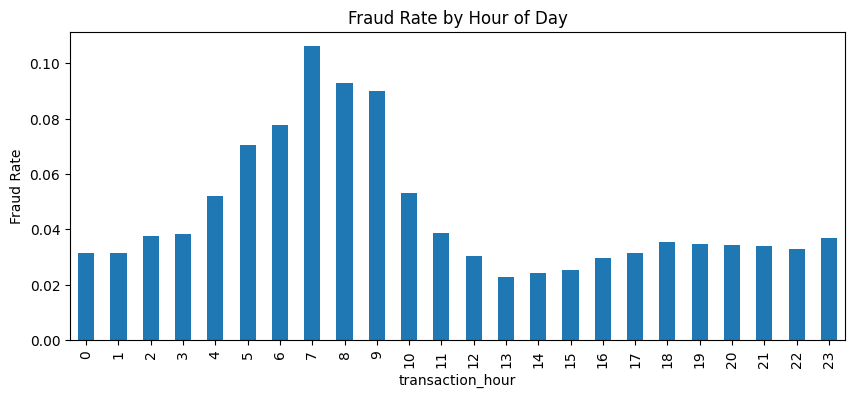

In [15]:
#fraud rate by hour
hourly_fraud = (transactions.groupby("transaction_hour")["isFraud"].mean())

hourly_fraud.plot(kind="bar", figsize=(10,4))
plt.title("Fraud Rate by Hour of Day")
plt.ylabel("Fraud Rate")
plt.show()

* It seems there are more Fraud Transactions Happening in the Morning hours of the day Especially during 4 to 10.

In [16]:
### Categorical Features

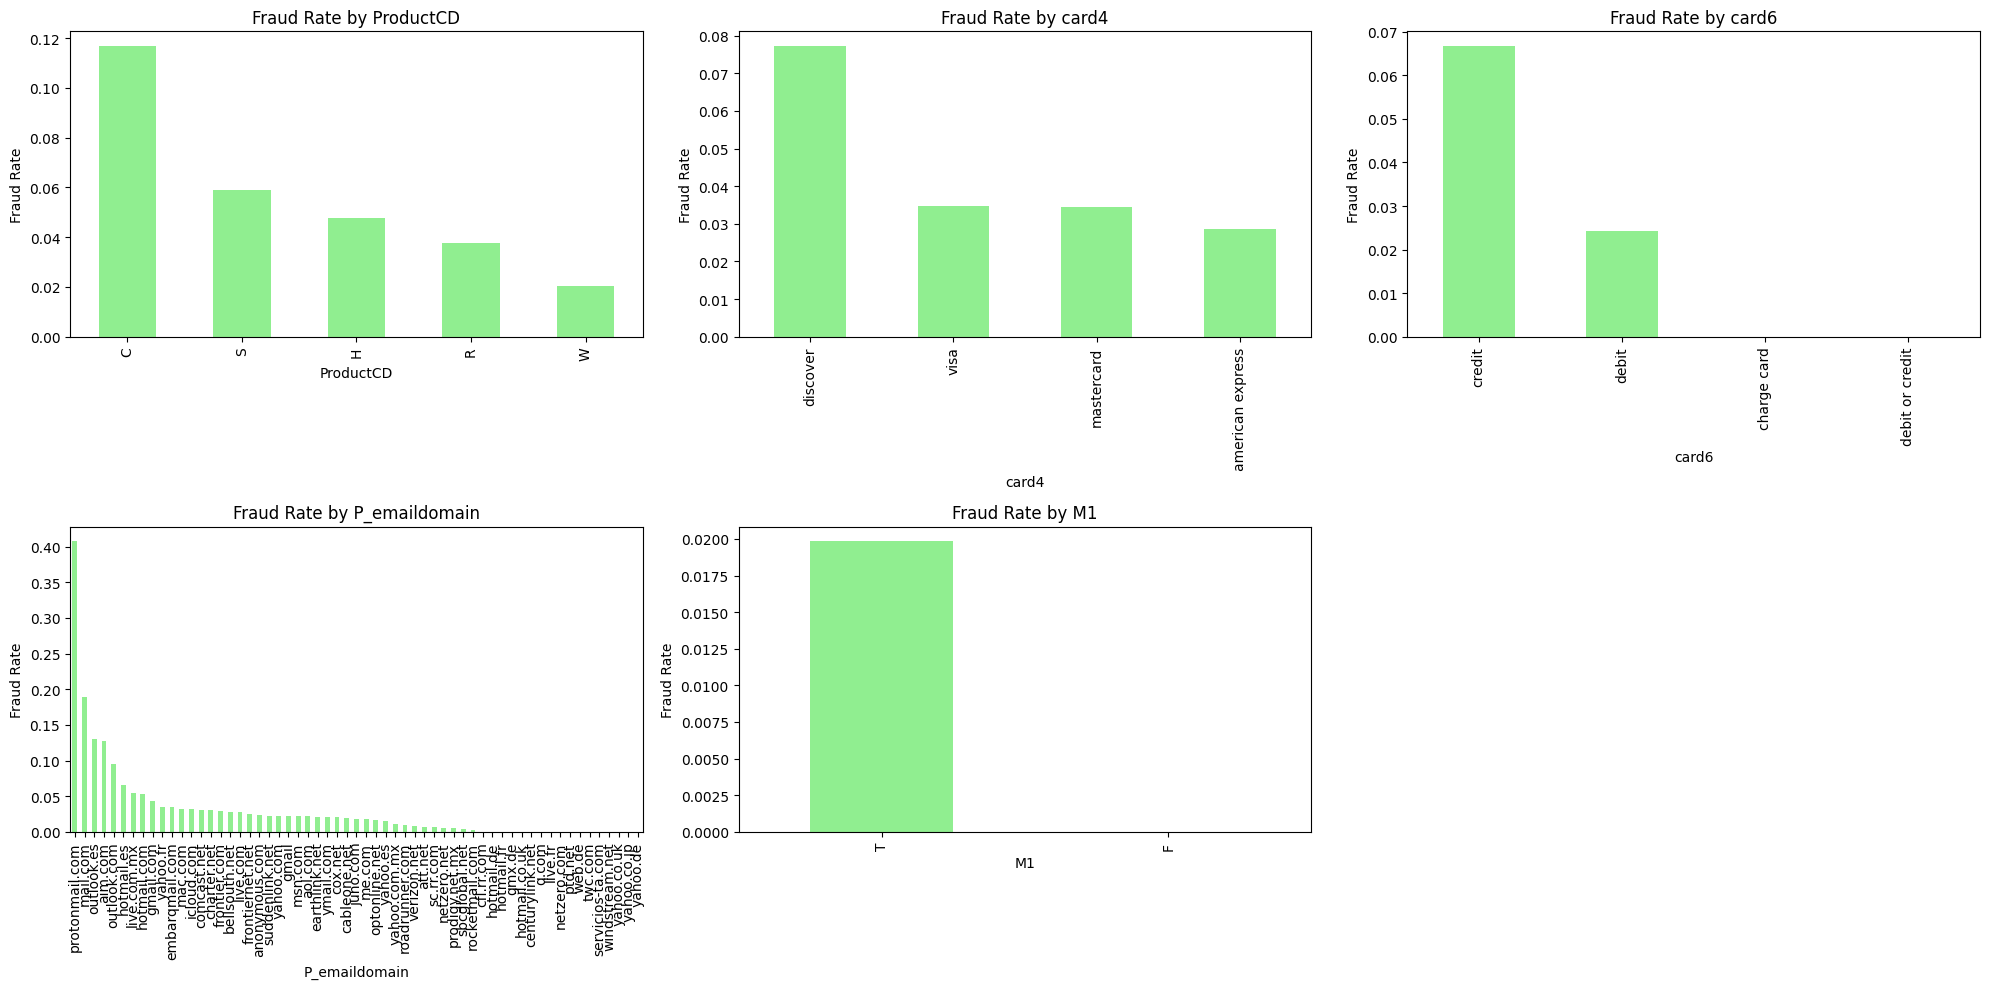

In [17]:
categorical_cols = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1']

plt.figure(figsize=(20,10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,3,i)
    cat_fraud = transactions.groupby(col)['isFraud'].mean().sort_values(ascending=False)
    cat_fraud.plot(kind='bar',  color = "LightGreen")
    plt.title(f'Fraud Rate by {col}')
    plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()

### Insights:-

- ProductCD: Fraud concentrated in C and S.

- card4: Discover shows higher fraud.

- card6: Fraud more frequent on credit followed by debit

- P_emaildomain: Certain email domains correlate with higher fraud with protonmail.com,mail.com being the top2 contributors.

- M1: Device mismatch strongly indicates fraudulent transactions.

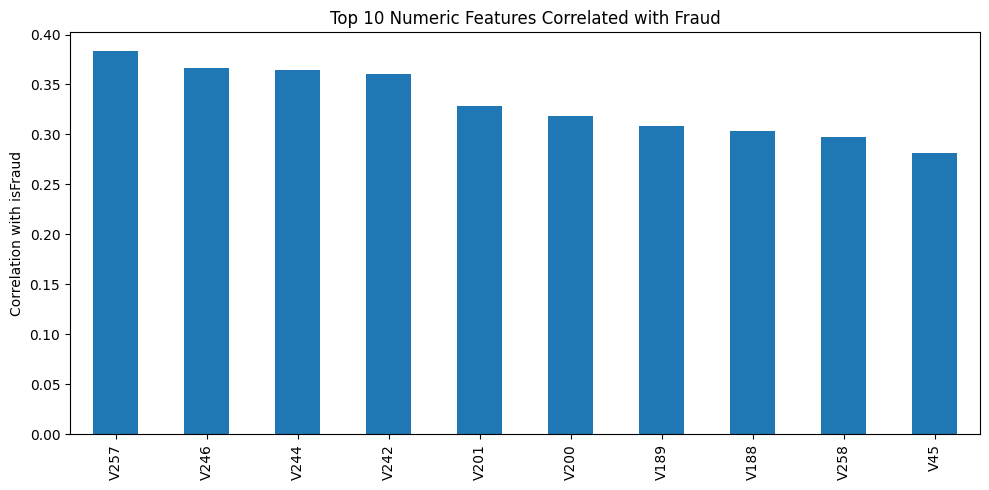

In [18]:
### Top 10 numeric correlations with isFraud
numeric_cols = transactions.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop('isFraud')

correlations = transactions[numeric_cols].corrwith(transactions['isFraud'])
correlations = correlations.sort_values(ascending=False)

plt.figure(figsize=(10,5))
correlations.head(10).plot(kind='bar')
plt.title("Top 10 Numeric Features Correlated with Fraud")
plt.ylabel("Correlation with isFraud")
plt.tight_layout()
plt.show()

### Insights:-
- No single numeric feature shows extremely high linear correlation with fraud, indicating that fraud detection is a **multi-factor problem**.
- Several anonymized V-features appear among the top correlated features, suggesting that engineered behavioral patterns (rather than raw amounts alone) are important.
- The relatively modest correlation values indicate that **tree-based models (e.g., LightGBM)** are more suitable than linear models for this problem.

In [19]:
### Card combinations, Device Patterns

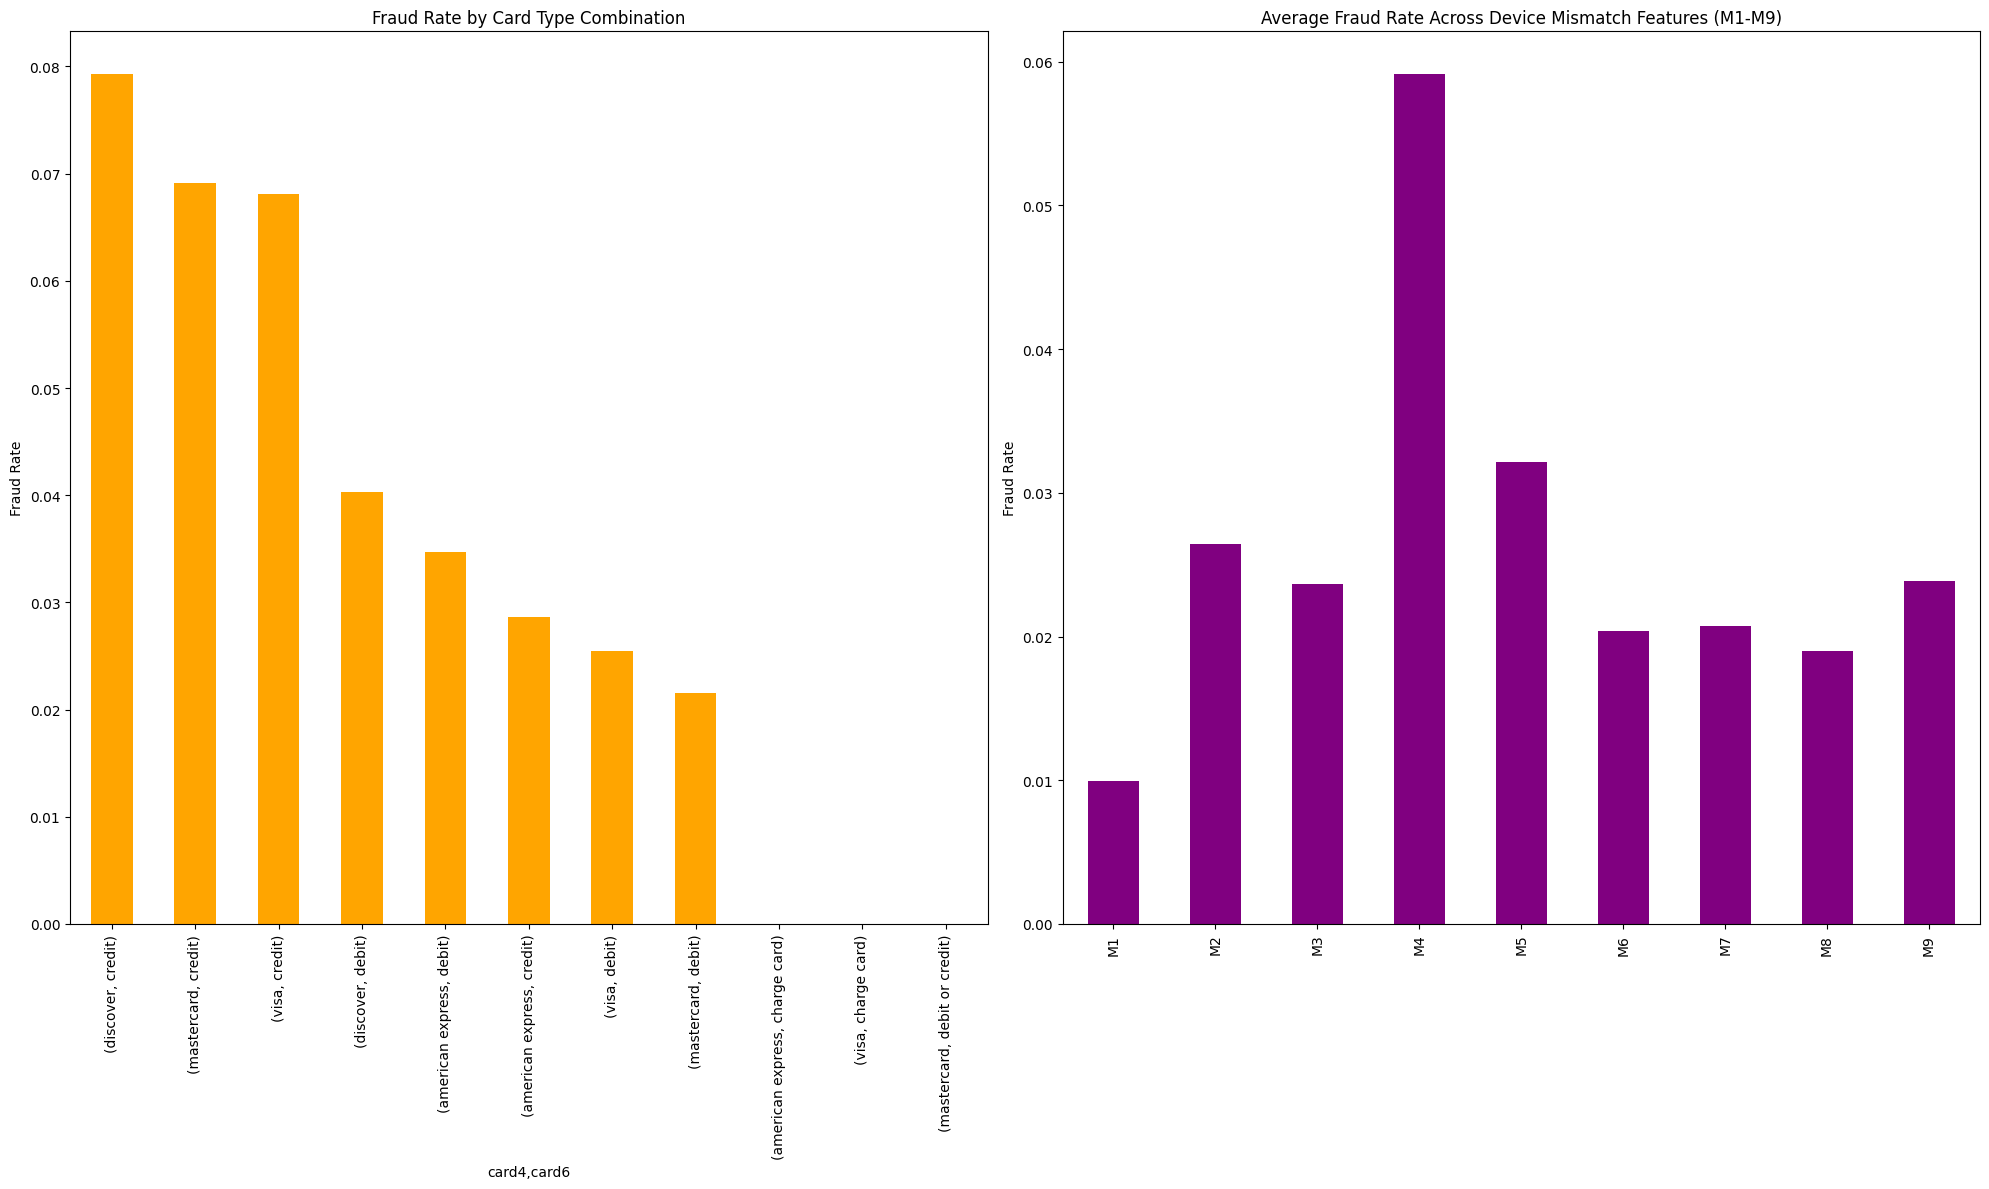

In [20]:
plt.figure(figsize=(20,12))

# Subplot 1 — Fraud by card4-card6 combination
plt.subplot(1,2,1)
card_combo = transactions.groupby(['card4','card6'])['isFraud'].mean().sort_values(ascending=False)
card_combo.plot(kind='bar', color='orange')
plt.title("Fraud Rate by Card Type Combination")
plt.ylabel("Fraud Rate")

# Subplot 2 — Fraud by device mismatch M1-M9 (mean across columns)
plt.subplot(1,2,2)
m_cols = ['M1','M2','M3','M4','M5','M6','M7','M8','M9']
device_fraud = transactions[m_cols].apply(lambda x: transactions.groupby(x)['isFraud'].mean())
device_fraud.mean().plot(kind='bar', color='purple')
plt.title("Average Fraud Rate Across Device Mismatch Features (M1-M9)")
plt.ylabel("Fraud Rate")

plt.tight_layout()
plt.show()

### Insights:-

- Card4-Card6 Combo: Certain credit card types are riskier (Discover-Credit, Master-Credit, Visa-Credit)

- Device Features (M1-M9): Device mismatch strongly correlates with fraud

### Data leakage Check:-

In [21]:
leakage_candidates = [col for col in transactions.columns if "id" in col.lower() or "addr" in col.lower()]

leakage_candidates[:10]

['TransactionID', 'addr1', 'addr2']

* we get TransactionID, addr1 and addr2 as the prime candidates for a data leakage because
- IDs can accidentally encode target info
- Address signals may be post-event artifacts

### EDA Summary
- Dataset is highly imbalanced (~3% fraud)
- Transaction amount distributions differ for fraud
- Significant missingness is expected and informative
- Time-of-day patterns correlate with fraud
- Data leakage risks identified in ID-like columns

### Next Step:- Feature engineering & preprocessing pipeline